In [4]:
import pandas as pd
import numpy as np
import requests

In [5]:
nh_df=pd.read_csv("https://www.denvergov.org/media/gis/DataCatalog/statistical_neighborhoods/csv/statistical_neighborhoods.csv")
nh_df.head()

,NBHD_ID,NBHD_NAME,TYPOLOGY,NOTES
0,2,Auraria,None,None
1,21,Cory - Merrill,None,None
2,7,Belcaro,None,None
3,70,Washington Park,None,None
4,71,Washington Park West,None,None


In [6]:
np.shape(nh_df)

(78, 4)

In [7]:
nh_df.drop(nh_df[nh_df['NBHD_NAME'] == 'CBD'].index, inplace = True)
np.shape(nh_df)

(77, 4)

In [8]:
# The code was removed by Watson Studio for sharing.

,NBHD_ID,NBHD_NAME,Latitude,Longitude
0,2,Auraria,39.747385,-105.025450
1,21,Cory - Merrill,39.689841,-104.967565
2,7,Belcaro,39.706468,-104.966593
3,70,Washington Park,39.697936,-104.983941
4,71,Washington Park West,39.700549,-104.998028


In [9]:
gps_df.drop(gps_df[gps_df['NBHD_NAME'] == 'CBD'].index, inplace = True)
np.shape(gps_df)

(77, 4)

In [10]:
### Add latitude and logitude values to neighborhood data frame
nh_df['Latitude']=gps_df['Latitude'].values
nh_df['Longitude']=gps_df['Longitude'].values

In [11]:
### Drop Unnecessary Fields
nh_df=nh_df.drop(['TYPOLOGY', 'NOTES', 'NBHD_ID'], axis=1)

nh_df.head()

,NBHD_NAME,Latitude,Longitude
0,Auraria,39.747385,-105.025450
1,Cory - Merrill,39.689841,-104.967565
2,Belcaro,39.706468,-104.966593
3,Washington Park,39.697936,-104.983941
4,Washington Park West,39.700549,-104.998028


In [12]:
### Import libraries for clustering and mapping
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

In [13]:
from geopy.geocoders import Nominatim

In [14]:
### Create Lat / Lon for Denver map
neighborhoods = nh_df

lat = 39.7642547
lon = -104.9951979
print(lat, lon)

39.7642547 -104.9951979


In [15]:
### Create map
map_denver = folium.Map(location=[lat, lon], zoom_start=11)

# Add neighborhood markers to map
for lat, lng, NBHD_NAME in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['NBHD_NAME']):
    label = '{}'.format(NBHD_NAME)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_denver)  
    
map_denver

In [16]:
### Define foursquare credentials
CLIENT_ID = 'HTGZRSO2TRM1YIWPCVYQEYSCJ42QZXCELI2HP4QNXVJQRA4F' # your Foursquare ID
CLIENT_SECRET = 'F2PBYRHYFSZGRS5FNH42OS5AIJJ3T254HM4SUVGADLKJDGYH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [17]:
### Explore first neighborhood
nh_df.loc[0, 'NBHD_NAME']

'Auraria'

In [18]:
### Get that neighborhoods lat and lon
neighborhood_latitude = nh_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = nh_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = nh_df.loc[0, 'NBHD_NAME'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Auraria are 39.7473847, -105.0254503.


In [19]:
### Get all places within 1500 m of here
radius = 1500

### Create the request URL
url_bars = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            neighborhood_latitude, 
            neighborhood_longitude, 
            radius)
url_bars

'https://api.foursquare.com/v2/venues/search?&client_id=HTGZRSO2TRM1YIWPCVYQEYSCJ42QZXCELI2HP4QNXVJQRA4F&client_secret=F2PBYRHYFSZGRS5FNH42OS5AIJJ3T254HM4SUVGADLKJDGYH&v=20180605&ll=39.7473847,-105.0254503&radius=1500'

In [20]:
### Import JSON library
from pandas.io.json import json_normalize
import json

In [21]:
results_bars = requests.get(url_bars).json()["response"]["venues"]
results_bars

[{'id': '5b10033e3e70ff00240753da',
  'name': 'valero',
  'location': {'lat': 39.747655,
   'lng': -105.025483,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.747655,
     'lng': -105.025483}],
   'distance': 30,
   'postalCode': '80211',
   'cc': 'US',
   'city': 'Denver',
   'state': 'CO',
   'country': 'United States',
   'formattedAddress': ['Denver, CO 80211', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d113951735',
    'name': 'Gas Station',
    'pluralName': 'Gas Stations',
    'shortName': 'Gas Station',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gas_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1595114559',
  'hasPerk': False},
 {'id': '4c56e7d1cc96c9b614ae772e',
  'name': 'Diamond Shamrock',
  'location': {'address': '1945 Federal Blvd',
   'crossStreet': 'at 20th Ave.',
   'lat': 39.74729714831834,
   'lng': -105.02566412988922,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.74729714831834,


In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
### Clean json and structure it as a new data frame
venues = results_bars#['response']['groups'][0]['items']
    
bars_df = json_normalize(venues) # flatten JSON


#bars = results_bars['response']['groups'][0]['items']

#bars = results_bars['response']['venues'][0]['categories']
    
#bars_df = json_normalize(bars) # flatten JSON
bars_df.head(10)

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,False,5b10033e3e70ff00240753da,NaN,...,30,"[Denver, CO 80211, United States]","[{'label': 'display', 'lat': 39.747655, 'lng':...",39.747655,-105.025483,80211,CO,valero,v-1595114559,NaN
1,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,False,4c56e7d1cc96c9b614ae772e,1945 Federal Blvd,...,20,"[1945 Federal Blvd (at 20th Ave.), Denver, CO ...","[{'label': 'display', 'lat': 39.74729714831834...",39.747297,-105.025664,80204,CO,Diamond Shamrock,v-1595114559,NaN
2,"[{'id': '4d954b0ea243a5684a65b473', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,535196be498e9a39637987c5,1945 Federal Blvd,...,25,"[1945 Federal Blvd, Denver, CO 80204, United S...","[{'label': 'display', 'lat': 39.74733300000000...",39.747333,-105.025738,80204,CO,Corner Store,v-1595114559,NaN
3,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",NaN,NaN,NaN,NaN,NaN,NaN,False,5262ca47498edc1ac8fba590,2001 Federal Blvd,...,67,"[2001 Federal Blvd, Denver, CO 80211, United S...","[{'label': 'display', 'lat': 39.74798, 'lng': ...",39.747980,-105.025578,80211,CO,Les Schwab,v-1595114559,566672303
4,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,False,4da8aa41cda119a2c903622c,2105 Federal Blvd,...,199,"[2105 Federal Blvd, Denver, CO 80211, United S...","[{'label': 'display', 'lat': 39.74917408037014...",39.749174,-105.025523,80211,CO,Sinclair,v-1595114559,NaN
5,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,False,501b224de4b0ca301e993c68,1921 Federal Blvd,...,226,"[1921 Federal Blvd (W. 19th Ave), Denver, CO 8...","[{'label': 'display', 'lat': 39.74744598169935...",39.747446,-105.028101,80204,CO,CROSSFIT JAI,v-1595114559,NaN
6,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,553f9b5f498e1e1fe7f4adb7,2924 W 20th Ave,...,94,[2924 W 20th Ave (btwn Federal Blvd & Mile Hig...,"[{'label': 'display', 'lat': 39.747316, 'lng':...",39.747316,-105.024345,80211,CO,Little Machine Beer,v-1595114559,477745967
7,"[{'id': '4bf58dd8d48988d151941735', 'name': 'T...",1310321,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/el-paisa-19...,False,56688ba5498e7c5a3f25b299,1920 N Federal Blvd,...,64,"[1920 N Federal Blvd, Denver, CO, United States]","[{'label': 'display', 'lat': 39.7469408698795,...",39.746941,-105.024962,NaN,CO,Tacos El Paisa,v-1595114559,NaN
8,[],NaN,NaN,NaN,NaN,NaN,NaN,False,4de52e4ed4c0704405acf05f,1940 Federal Blvd,...,58,"[1940 Federal Blvd, Denver, CO 80204, United S...","[{'label': 'display', 'lat': 39.74726300000000...",39.747263,-105.024780,80204,CO,Santos Mufflers,v-1595114559,NaN
9,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,False,4a7615aef964a52029e21fe3,2201 Clay St.,...,535,"[2201 Clay St., Denver, CO 80211, United States]","[{'label': 'display', 'lat': 39.74997501388818...",39.749975,-105.020175,80211,CO,Jefferson Park,v-1595114559,NaN


In [24]:

# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
bars_df =bars_df.loc[:, filtered_columns]

# filter the category for each row
bars_df['venue.categories'] = bars_df.apply(get_category_type, axis=1)

# clean columns
bars_df.columns = [col.split(".")[-1] for col in bars_df.columns]

bars_df.head(30)

,name,categories,lat,lng,categories
0,valero,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",39.747655,-105.025483,Gas Station
1,Diamond Shamrock,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",39.747297,-105.025664,Gas Station
2,Corner Store,"[{'id': '4d954b0ea243a5684a65b473', 'name': 'C...",39.747333,-105.025738,Convenience Store
3,Les Schwab,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",39.747980,-105.025578,Automotive Shop
4,Sinclair,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",39.749174,-105.025523,Gas Station
5,CROSSFIT JAI,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",39.747446,-105.028101,Gym
6,Little Machine Beer,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",39.747316,-105.024345,Brewery
7,Tacos El Paisa,"[{'id': '4bf58dd8d48988d151941735', 'name': 'T...",39.746941,-105.024962,Taco Place
8,Santos Mufflers,[],39.747263,-105.024780,None
9,Jefferson Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",39.749975,-105.020175,Park


In [25]:
np.shape(bars_df)

(30, 5)

In [26]:
### Create function to repeat for all neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500, categoryId='4bf58dd8d48988d116941735'):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url_bars = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            categoryId)
            
        # make the GET request
        results = requests.get(url_bars).json()["response"]["venues"]
        
        # return only relevant information for each nearby venue
        #venues_list.append([(
        #    name, 
        #    lat, 
        #    lng, 
        #    v['venue']['name'], 
        #    v['venue']['location']['lat'], 
        #    v['venue']['location']['lng'],  
        #    v['venue']['categories'][0]['name']) for v in results])
        venues_list.append([(
        name, 
        lat, 
        lng, 
        v['name'], 
        v['location']['lat'], 
        v['location']['lng']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [27]:
denver_venues = getNearbyVenues(names=nh_df['NBHD_NAME'],
                                   latitudes=nh_df['Latitude'],
                                   longitudes=nh_df['Longitude']
                                  )

Auraria
Cory - Merrill
Belcaro
Washington Park
Washington Park West
Speer
Cherry Creek
Country Club
Congress Park
City Park
Marston
Fort Logan
Washington Virginia Vale
Barnum
Barnum West
West Colfax
West Highland
Sloan Lake
Berkeley
Regis
Chaffee Park
Highland
Athmar Park
Wellshire
University
Rosedale
Cheesman Park
Hilltop
Montclair
Hale
North Park Hill
South Park Hill
University Park
Platt Park
Overland
Ruby Hill
Kennedy
Hampden
Southmoor Park
Hampden South
Indian Creek
Goldsmith
University Hills
Harvey Park
Mar Lee
East Colfax
Capitol Hill
North Capitol Hill
Civic Center
Union Station
Stapleton
Montbello
Lowry Field
Gateway - Green Valley Ranch
Harvey Park South
College View - South Platte
City Park West
Sun Valley
Valverde
Villa Park
Five Points
Globeville
Bear Valley
Virginia Village
Windsor
Jefferson Park
Northeast Park Hill
Elyria Swansea
Baker
Clayton
Skyland
Lincoln Park
Whittier
Cole
Westwood
Sunnyside
DIA


In [28]:
print(denver_venues.shape)
denver_venues.head()

(280, 6)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Auraria,39.747385,-105.025450,El Patron Sports Bar,39.744199,-105.025602
1,Auraria,39.747385,-105.025450,fieldhouse,39.742781,-105.024771
2,Auraria,39.747385,-105.025450,Jefferson Park Pub,39.753336,-105.023835
3,Cory - Merrill,39.689841,-104.967565,Aums HQ West,39.685561,-104.967900
4,Belcaro,39.706468,-104.966593,Seven Zero One,39.709028,-104.970279


In [33]:
bar_counts=denver_venues.groupby('Neighborhood').count()
bar_counts.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Neighborhood,,,,,
Athmar Park,1,1,1,1,1
Auraria,3,3,3,3,3
Baker,2,2,2,2,2
Barnum,1,1,1,1,1
Barnum West,1,1,1,1,1


In [34]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [35]:
### Drop Unnecessary Fields
bar_counts=bar_counts.drop(['Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude'], axis=1)
bar_counts.rename({'Neighborhood Latitude': 'Bar Count'}, axis=1, inplace=True)

bar_counts.head()

,Bar Count
Neighborhood,
Athmar Park,1
Auraria,3
Baker,2
Barnum,1
Barnum West,1


In [55]:
most_bars=bar_counts.sort_values(by='Bar Count',ascending=False)
top_most_bars=most_bars.head(10)

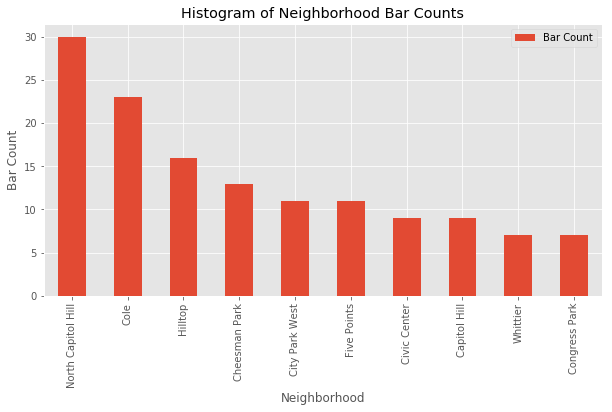

In [56]:
top_most_bars.plot(kind='bar', figsize=(10, 5))

plt.title('Histogram of Neighborhood Bar Counts') # add a title to the histogram
plt.ylabel('Bar Count') # add y-label
plt.xlabel('Neighborhood') # add x-label

plt.show()